<a href="https://colab.research.google.com/github/hardikdhamija96/AeroFit/blob/main/Aerofitcasestudy_HardikDhamija_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🟦 Business Case - Aerofit - Descriptive Statistics & Probability

<div align="center">
  <img src="https://raw.githubusercontent.com/hardikdhamija96/AeroFit/refs/heads/main/mainLogoFinal.png" width="400">
</div>

### 🔹 About Aerofit

- **Leading Fitness Brand**: Aerofit is a well-known brand in the fitness equipment industry.
- **Wide Product Range**:
  - Treadmills
  - Exercise bikes
  - Gym equipment
  - Fitness accessories
- **Caters to Everyone**: Designed to meet the fitness needs of people from all categories and fitness levels.

## 🔷 Business Problem

- The market research team wants to understand:
  - What type of customers prefer each **treadmill model**.
  
- The goal is to:
  - Suggest the most suitable treadmill to new customers based on their profile.


### 🔹 Objectives

- Perform **descriptive analytics** to create detailed **customer profiles** for each treadmill product.
- Understand how **customer characteristics** (like gender, age group, income, fitness level, etc.) vary across different treadmill types.
- Use **tables and charts** to visualize and summarize key patterns in customer behavior.

### 🔹 Analytical Approach

- Construct **two-way contingency tables** to study the relationship between treadmill types and various customer attributes.
- Compute and interpret the following probabilities:
  - **Marginal Probabilities**: Likelihood of individual events (e.g., selecting a treadmill type).
  - **Conditional Probabilities**: Likelihood of an event given another (e.g., treadmill preference given age group).
- Derive **actionable insights** to help:
  - Improve targeted marketing strategies.
  - Recommend the right treadmill to different customer segments.

### 🔹Product Portifolio

<div align="center">
  <img src="https://raw.githubusercontent.com/hardikdhamija96/AeroFit/refs/heads/main/Portfolio.png" width="400">
</div>

## 🔷 Initial Hypotheses

- **Income vs Product Choice**: Customers with higher income are more likely to buy the premium KP781 treadmill.
- **Age Factor**: Younger customers may prefer the entry-level KP281, while older users may go for KP481 or KP781.
- **Gender Preference**: Males might show a higher preference for advanced models like KP781.
- **Usage Frequency**: Regular or daily users may invest in more durable, feature-rich models.
- **Marital Status**: Married individuals may lean towards mid-range products like KP481 for shared use at home.



## 🔷 1. Load and Understand the Data

In [ ]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Link Google Drive for file access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing and loading file
# Dataset loaded from local project folder (e.g., /netflix.xlsx)
file_path = '/content/drive/MyDrive/AeroFit Project/aerofit_treadmill.xlsx'

import pandas as pd
df = pd.read_excel(file_path)
print("Dataset Loaded Successfully. Shape:", df.shape)

Dataset Loaded Successfully. Shape: (180, 9)


In [ ]:
df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66


In [ ]:
df.columns.tolist()

['Product',
 'Age',
 'Gender',
 'Education',
 'MaritalStatus',
 'Usage',
 'Fitness',
 'Income',
 'Miles']

#### 🔹 Column Observations

- `Product` : Treadmill model purchased (KP281, KP481, or KP781)
- `Age` : Age of the customer (in years)
- `Gender` : Gender of the customer (Male/Female)
- `Education` : Years of formal education completed by the customer
- `MaritalStatus` : Marital status of the customer (Single/Married)
- `Usage` : How frequently the treadmill is used (days per week)
- `Fitness` : Self-reported fitness level (scale of 1 to 5, where 5 = very fit)
- `Income` : Annual income of the customer (in USD)
- `Miles` : Average miles walked/ran on the treadmill per week


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### 🔹 `df.info()` Observations:

#### 🔹 Feature Types
- The following columns are of `object` type:
  - `Product`, `Gender`, and `MaritalStatus`
  - These can be converted to `category` type to optimize memory usage and improve performance during analysis.

- The remaining 6 features are **numerical**:
  - `Age`, `Education`, `Usage`, `Fitness`, `Income`, and `Miles`
  - These can be used as-is for analysis, and later **grouped into bins** (e.g., income group, usage frequency) to derive **segment-based insights**.



#### 🔹Numerical Features Overview



In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


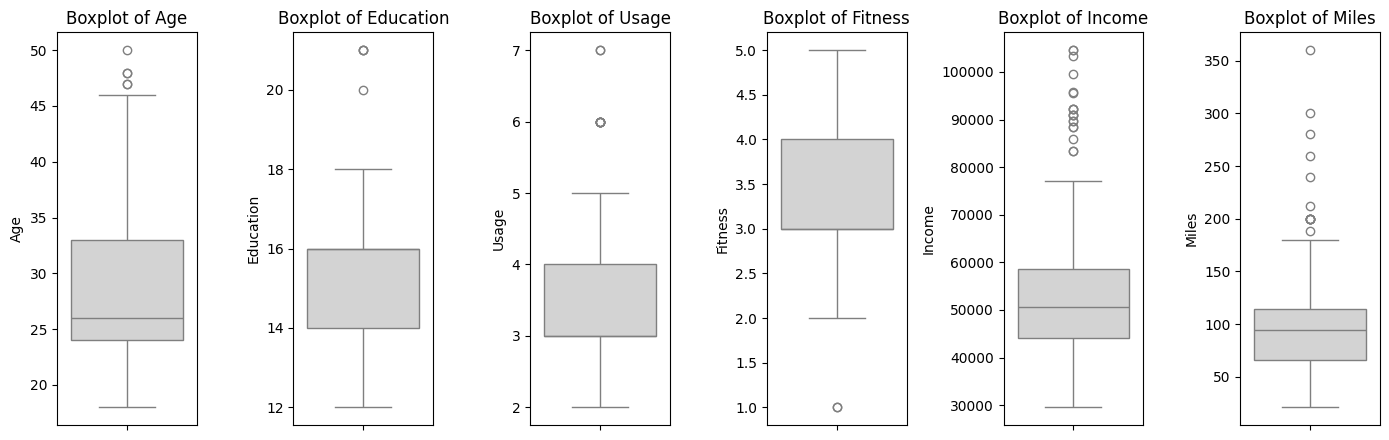

In [ ]:
num_cols = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']


plt.figure(figsize=(14, 4.5))

for i, col in enumerate(num_cols):
  plt.subplot(1,6,i+1)
  sns.boxplot(y=df[col], color='lightgrey')
  plt.title('Boxplot of '+ col)

plt.tight_layout()
plt.show()

### 🔹 Observations: Numerical Features (from `describe()` + Boxplots)

- **Age**:
  - Most customers are young adults (median: 26 years).
  - Mild right skew with a few outliers beyond 45 years.
  
- **Education**:
  - Median education level is 16 years, suggesting college graduates.
  - Slight spread, with a few outliers at 20–21 years (possibly postgraduates).

- **Usage (per week)**:
  - Most users plan to use the treadmill 3–4 times/week.
  - Max is 7, with light right skew and a couple of high-usage outliers.

- **Fitness (self-rated 1–5)**:
  - Median fitness level is 3.
  - Values are spread across all levels, with one low-end outlier at 1.

- **Income (annual in USD)**:
  - Median income is around `$50,596`, but distribution is right-skewed.
  - Several high-income outliers above `$75,000–$100,000`.

- **Miles (per week)**:
  - Customers expect to walk/run ~94 miles median per week.
  - A few high-end users reporting over 200+ miles — clear outliers present.

These observations support the need for outlier handling (especially in `Income` and `Miles`) and guide how we interpret user behavior based on frequency, fitness, and affordability.


#### 🔹Object Featuers Overview
- Three features all should be converted to category type

In [ ]:
df.describe(include=[object])

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


#### 🔹 Observations:
- The most frequently purchased product is **KP281**, selected by 80 out of 180 customers.
- **Male** customers form the majority.
- A significant portion of customers are **partnered**.

In [ ]:
df.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


### 🔹Observation on Unique Values

- `Product`, `Gender`, and `MaritalStatus` are low-cardinality categorical features.
- `Usage`, `Fitness`, and `Education` have moderate distinct values — good for grouped analysis.
- `Age`, `Income`, and `Miles` are continuous with many unique values
  - ℹ️ already noted for possible binning or outlier treatment.


In [ ]:
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [ ]:
df.duplicated().sum()

np.int64(0)

### ✅ Missing Values Check

No missing values were found in the dataset across any of the columns.  


## 🔷 2. Data PreProcessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### 🔹1. Changing Data Type

In [ ]:
# changing data types to category
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


### 🔹2. Feature Extraction
  - New Relevant columns for more insights

In [ ]:
# Creating Price Column

# Price mapping in USD
price_map = {
    'KP281': 1500,
    'KP481': 1750,
    'KP781': 2500
}

# Add new column
df['Price'] = df['Product'].map(price_map)


In [ ]:
# setting its data type to int
df['Price'] = df['Price'].astype('int')

In [ ]:
# checking income range
df['Income'].describe()

,Income
count,180.000000
mean,53719.577778
std,16506.684226
min,29562.000000
25%,44058.750000
50%,50596.500000
75%,58668.000000
max,104581.000000


In [ ]:
# Get percentiles
q25 = df['Income'].quantile(0.25)
q75 = df['Income'].quantile(0.75)

# Function to label
def income_level(x):
    if x < q25:
        return 'Low'
    elif x > q75:
        return 'High'
    else:
        return 'Mid'

df['IncomeGroup'] = df['Income'].apply(income_level)

In [ ]:
df['IncomeGroup'] = df['IncomeGroup'].astype('category')

### 🔹 Income Grouping Strategy

To analyze customer behavior across income levels, we grouped `Income` into three categories using the 25th and 75th percentiles:

- **Low**: Income below 25th percentile (`< $44,000`)
- **Mid**: Income between 25th and 75th percentile (`$44,000–58,668`)
- **High**: Income above 75th percentile (`> $58,668`)

This method ensures balanced segments based on actual data distribution, making our comparisons more reliable.


In [ ]:
df['Miles'].describe()

,Miles
count,180.000000
mean,103.194444
std,51.863605
min,21.000000
25%,66.000000
50%,94.000000
75%,114.750000
max,360.000000


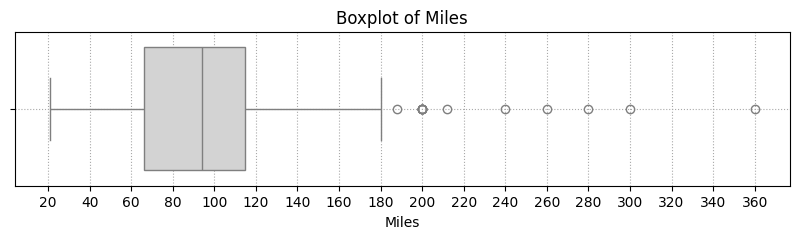

In [ ]:
plt.figure(figsize=(10, 2))
sns.boxplot(x = df['Miles'],color='lightgrey')
plt.xticks(np.arange(20,380,20))
plt.grid(color="darkgrey", ls=":")
plt.title('Boxplot of Miles')
plt.show()

In [ ]:
min_miles = df['Miles'].min()
max_miles = df['Miles'].max()
median_miles = df['Miles'].median()
miles_25percentile = df['Miles'].quantile(0.25)
miles_75percentile = df['Miles'].quantile(0.75)

print(f"Minimum Miles: {min_miles}")
print(f"Maximum Miles: {max_miles}")
print(f"Median Miles: {median_miles}")
print(f"25th Percentile Miles: {miles_25percentile}")
print(f"75th Percentile Miles: {miles_75percentile}")

Minimum Miles: 21
Maximum Miles: 360
Median Miles: 94.0
25th Percentile Miles: 66.0
75th Percentile Miles: 114.75


In [ ]:
# Function to label
def miles_level(x):
    if x < miles_25percentile:
        return 'Low'
    elif (x <= miles_75percentile) & (x>= miles_25percentile) :
        return 'Median'
    elif (x>miles_75percentile) & (x<=180):
        return 'High'
    else:
        return 'Very High'

df['MilesGroup'] = df['Miles'].apply(miles_level)

In [ ]:
df['MilesGroup'] = df['MilesGroup'].astype('category')

In [ ]:
df['MilesGroup'].value_counts()

,count
MilesGroup,
Median,99
Low,36
High,32
Very High,13


### 🔹 Miles Grouping Strategy

To better understand customer workout behavior, we grouped the `Miles` variable into four categories based on percentile ranges:

- **Low**: Less than 25th percentile (light users)
- **Median**: Between 25th and 75th percentile (moderate users)
- **High**: Greater than 75th percentile, up to 180 miles (active users)
- **Very High**: More than 180 miles per week (intensive users)

This grouping helps capture different usage levels and highlights customers with extremely high weekly mileage for deeper profiling.


In [ ]:
df['Education'].describe()

,Education
count,180.000000
mean,15.572222
std,1.617055
min,12.000000
25%,14.000000
50%,16.000000
75%,16.000000
max,21.000000


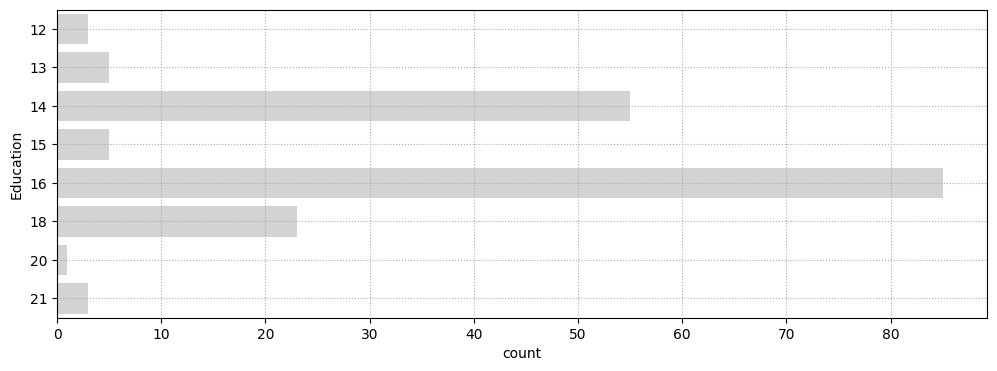

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(y=df['Education'],color='lightgrey')
plt.grid(color="darkgrey", ls=":")

In [ ]:
def education_level(x):
    if x <= 12:
        return 'School'
    elif x <= 16:
        return 'Graduate'
    else:
        return 'Postgraduate'

df['EducationGroup'] = df['Education'].apply(education_level)


In [ ]:
df['EducationGroup'] = df['EducationGroup'].astype('category')

### 🔹 Education Grouping Strategy

To simplify the interpretation of the `Education` variable, we grouped years of education into the following levels:

- **School**: 12 years or less
- **Graduate**: 13 to 16 years (most common group)
- **Postgraduate**: More than 16 years

This segmentation aligns with typical academic stages and supports clearer customer profiling.


In [ ]:
df['EducationGroup'].value_counts()

,count
EducationGroup,
Graduate,150
Postgraduate,27
School,3


In [ ]:
df['Age'].describe()

,Age
count,180.000000
mean,28.788889
std,6.943498
min,18.000000
25%,24.000000
50%,26.000000
75%,33.000000
max,50.000000


- 4 groups can be made for `Age` column to create new column `AgeGroup`
  - `18-24`
  - `25-33`
  - `34-40`
  - `40-50`

In [ ]:
# creating Age group with 4 groups
bins = [18,25,34,40,51]
labels = ['18-24', '25-33', '34-40', '40-50']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [ ]:
df['AgeGroup'].value_counts()

,count
AgeGroup,
25-33,84
18-24,54
34-40,25
40-50,17


In [ ]:
# confirming correctly done
df['AgeGroup'].describe()

,AgeGroup
count,180
unique,4
top,25-33
freq,84


In [ ]:
# IncomeGroup Column
df['IncomeGroup'].value_counts()

,count
IncomeGroup,
Mid,90
High,45
Low,45


`Income` and `Miles` have very varied range of data, required outlier handling

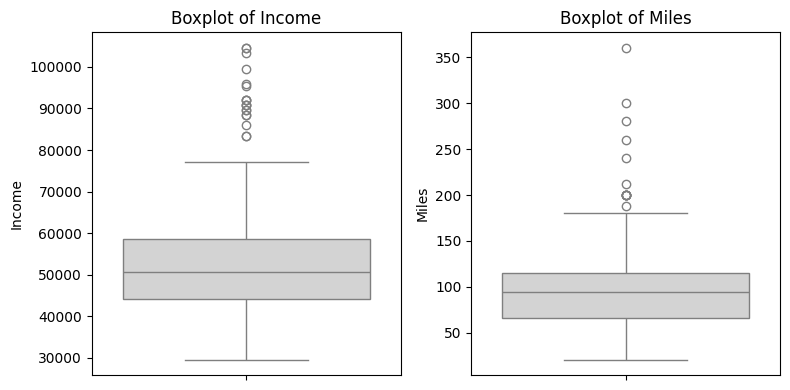

In [ ]:
plt.figure(figsize=(8, 4))

plt.subplot(1,2,1)
sns.boxplot(y=df['Income'], color='lightgrey')
plt.title('Boxplot of Income')

plt.subplot(1,2,2)
sns.boxplot(y=df['Miles'],color='lightgrey')
plt.title('Boxplot of Miles')

plt.tight_layout()
plt.show()

### 🔹3. Outlier Handling (Capping at 95th Percentile)

- `Income` and `Miles` columns showed some very high values in the boxplots.
- These values are **not wrong**, but they can:
  - Mislead summary statistics like mean and standard deviation.
  - Stretch the scale of graphs and make them harder to interpret.
  - Affect fair comparison between different customer groups.

- So, we applied **capping (Winsorization)** at the 95th percentile:
  - If a value is above the 95th percentile, we replaced it with the 95th percentile value.
  - We didn’t delete any rows; just reduced extreme impact.

- The goal is to:
  - Keep the overall data structure.
  - Focus analysis on **typical customer behavior**.
  - Avoid misleading results due to a few extreme cases.

In [ ]:
print(f"Income Cap: {round(df['Income'].quantile(0.95))}")
print(f"Miles Cap: {df['Miles'].quantile(0.95)}")

Income Cap: 90948
Miles Cap: 200.0


In [ ]:
cap_income = round(df['Income'].quantile(0.95))
cap_miles = df['Miles'].quantile(0.95)

df['Income_Cap'] = np.where(df['Income']>cap_income, int(cap_income), df['Income'])
df['Miles_Cap'] = np.where(df['Miles']>cap_miles, int(cap_miles), df['Miles'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Product         180 non-null    category
 1   Age             180 non-null    int64   
 2   Gender          180 non-null    category
 3   Education       180 non-null    int64   
 4   MaritalStatus   180 non-null    category
 5   Usage           180 non-null    int64   
 6   Fitness         180 non-null    int64   
 7   Income          180 non-null    int64   
 8   Miles           180 non-null    int64   
 9   Price           180 non-null    int64   
 10  IncomeGroup     180 non-null    category
 11  MilesGroup      180 non-null    category
 12  EducationGroup  180 non-null    category
 13  AgeGroup        180 non-null    category
 14  Income_Cap      180 non-null    int64   
 15  Miles_Cap       180 non-null    int64   
dtypes: category(7), int64(9)
memory usage: 15.0 KB


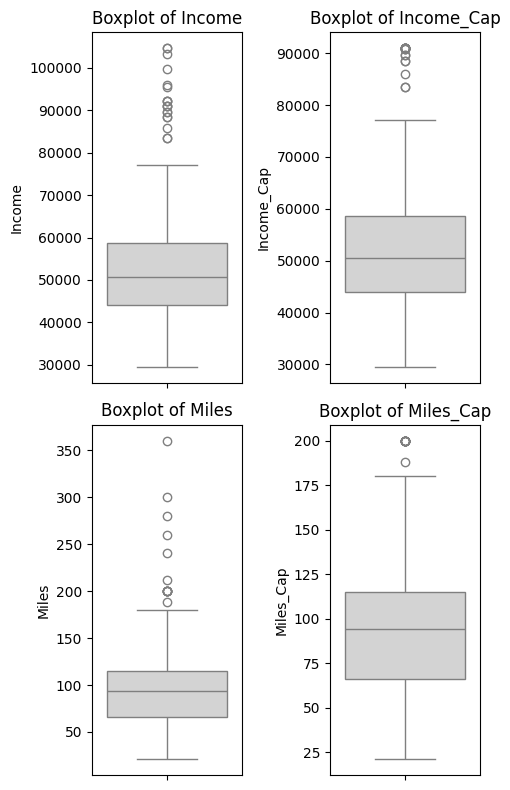

In [ ]:
num_cols = ['Income', 'Income_Cap', 'Miles', 'Miles_Cap']

plt.figure(figsize=(5, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2,2, i+1)
    sns.boxplot(y=df[col], color='lightgrey')
    plt.title('Boxplot of '+ col)

plt.tight_layout()
plt.show()

### Data Preprocessing Summary

- No missing values were found in the dataset.
- Categorical columns like `Gender`, `MaritalStatus`, and `Product` were converted to the `category` data type.
- Outliers were detected in `Income` and `Miles`, and capped at the 95th percentile to reduce their impact.
- No new features were created, as existing columns sufficiently support the analysis goals.


## 🔷 Non Graphical Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Product         180 non-null    category
 1   Age             180 non-null    int64   
 2   Gender          180 non-null    category
 3   Education       180 non-null    int64   
 4   MaritalStatus   180 non-null    category
 5   Usage           180 non-null    int64   
 6   Fitness         180 non-null    int64   
 7   Income          180 non-null    int64   
 8   Miles           180 non-null    int64   
 9   Price           180 non-null    int64   
 10  IncomeGroup     180 non-null    category
 11  MilesGroup      180 non-null    category
 12  EducationGroup  180 non-null    category
 13  AgeGroup        180 non-null    category
 14  Income_Cap      180 non-null    int64   
 15  Miles_Cap       180 non-null    int64   
dtypes: category(7), int64(9)
memory usage: 15.0 KB


In [ ]:
product = df['Product']
product = product.value_counts()
product = product.reset_index()
product.columns = ['Product', 'Count']
product

,Product,Count
0,KP281,80
1,KP481,60
2,KP781,40


In [ ]:
# Step 2: Add price
price_map = {
    'KP281': 1500,
    'KP481': 1750,
    'KP781': 2500
}
product['Price'] = product['Product'].map(price_map)


In [ ]:
product['Percent'] = round((product['Count'] / product['Count'].sum()) * 100,2)

# View final table
product

,Product,Count,Price,Percent
0,KP281,80,1500,44.44
1,KP481,60,1750,33.33
2,KP781,40,2500,22.22


#### Cheapest one have most sale and expensive one have the least

In [ ]:
ct = pd.crosstab(df['Gender'], df['Product'], normalize='index', margins=True) * 100
ct = ct.round(2)  # Round percentages
ct

Product,KP281,KP481,KP781
Gender,,,
Female,52.63,38.16,9.21
Male,38.46,29.81,31.73
All,44.44,33.33,22.22


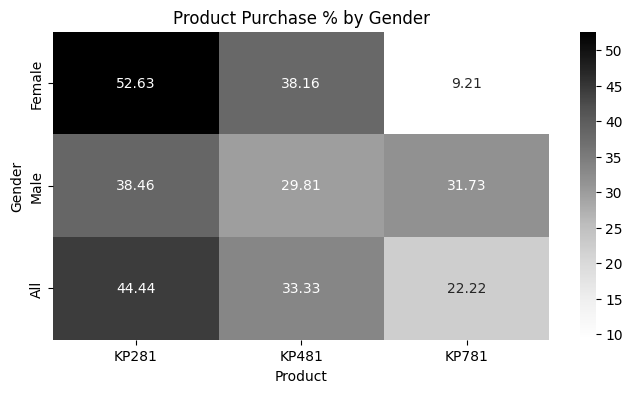

In [ ]:
# Plot heatmap
plt.figure(figsize=(8,4))
sns.heatmap(ct, annot=True, cmap='Greys', fmt=".2f")
plt.title("Product Purchase % by Gender")
plt.ylabel("Gender")
plt.xlabel("Product")
plt.show()

In [ ]:
pd.crosstab(df['Gender'], df['Product'],normalize='index',margins=True)*100 # Percentage of product by each gender

Product,KP281,KP481,KP781
Gender,,,
Female,52.631579,38.157895,9.210526
Male,38.461538,29.807692,31.730769
All,44.444444,33.333333,22.222222


#### Female prefer more KP281; beside KP781 is highly preferred by male

In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Price', 'IncomeGroup', 'MilesGroup',
       'EducationGroup', 'AgeGroup', 'Income_Cap', 'Miles_Cap'],
      dtype='object')

In [ ]:
pd.crosstab(df['MaritalStatus'], df['Product'],normalize='index')*100

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,44.859813,33.644860,21.495327
Single,43.835616,32.876712,23.287671


In [ ]:
pd.crosstab(df['IncomeGroup'], df['Product'],normalize='index')*100

Product,KP281,KP481,KP781
IncomeGroup,,,
High,15.555556,20.000000,64.444444
Low,66.666667,33.333333,0.000000
Mid,47.777778,40.000000,12.222222


In [ ]:
pd.crosstab(df['AgeGroup'], df['Product'],normalize='index')*100

Product,KP281,KP481,KP781
AgeGroup,,,
18-24,50.000000,31.481481,18.518519
25-33,40.476190,33.333333,26.190476
34-40,48.000000,40.000000,12.000000
40-50,41.176471,29.411765,29.411765


In [ ]:
pd.crosstab(df['IncomeGroup'], df['Product'],normalize='index')*100

Product,KP281,KP481,KP781
IncomeGroup,,,
High,15.555556,20.000000,64.444444
Low,66.666667,33.333333,0.000000
Mid,47.777778,40.000000,12.222222


In [ ]:
pd.crosstab(df['EducationGroup'], df['Product'],normalize='index')*100

Product,KP281,KP481,KP781
EducationGroup,,,
Graduate,50.666667,38.000000,11.333333
Postgraduate,7.407407,7.407407,85.185185
School,66.666667,33.333333,0.000000


In [ ]:
pd.crosstab(df['MilesGroup'], df['Product'],normalize='index')*100

Product,KP281,KP481,KP781
MilesGroup,,,
High,15.625000,21.875000,62.500000
Low,50.000000,50.000000,0.000000
Median,56.565657,34.343434,9.090909
Very High,7.692308,7.692308,84.615385


In [ ]:
(round(df.groupby(['Gender', 'Product'])['Income'].mean())).unstack()


<ipython-input-137-c13932c95ad4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (round(df.groupby(['Gender', 'Product'])['Income'].mean())).unstack()


Product,KP281,KP481,KP781
Gender,,,
Female,46020.0,49336.0,73634.0
Male,46816.0,48634.0,75825.0


In [ ]:
pd.crosstab(df['Fitness'], df['Product'],normalize='index')*100

Product,KP281,KP481,KP781
Fitness,,,
1,50.000000,50.000000,0.000000
2,53.846154,46.153846,0.000000
3,55.670103,40.206186,4.123711
4,37.500000,33.333333,29.166667
5,6.451613,0.000000,93.548387


In [ ]:
pd.crosstab(df['Usage'], df['Product'],normalize='index')*100

Product,KP281,KP481,KP781
Usage,,,
2,57.575758,42.424242,0.000000
3,53.623188,44.927536,1.449275
4,42.307692,23.076923,34.615385
5,11.764706,17.647059,70.588235
6,0.000000,0.000000,100.000000
7,0.000000,0.000000,100.000000


## Univariate Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Product         180 non-null    category
 1   Age             180 non-null    int64   
 2   Gender          180 non-null    category
 3   Education       180 non-null    int64   
 4   MaritalStatus   180 non-null    category
 5   Usage           180 non-null    int64   
 6   Fitness         180 non-null    int64   
 7   Income          180 non-null    int64   
 8   Miles           180 non-null    int64   
 9   Price           180 non-null    int64   
 10  IncomeGroup     180 non-null    category
 11  MilesGroup      180 non-null    category
 12  EducationGroup  180 non-null    category
 13  AgeGroup        180 non-null    category
 14  Income_Cap      180 non-null    int64   
 15  Miles_Cap       180 non-null    int64   
dtypes: category(7), int64(9)
memory usage: 15.0 KB


In [ ]:
colors = ['#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94','mediumseagreen','plum']  # You can customize this


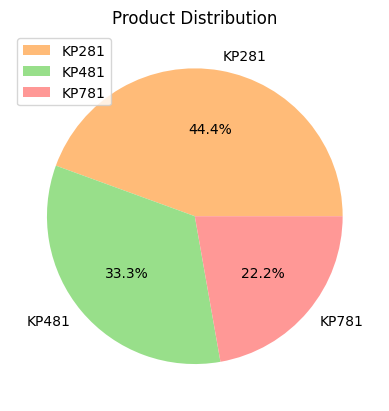

In [ ]:
product

plt.pie(product['Count'], labels = product['Product'],autopct='%1.1f%%', colors= colors[1:4])
plt.legend()
plt.title('Product Distribution')
plt.show()

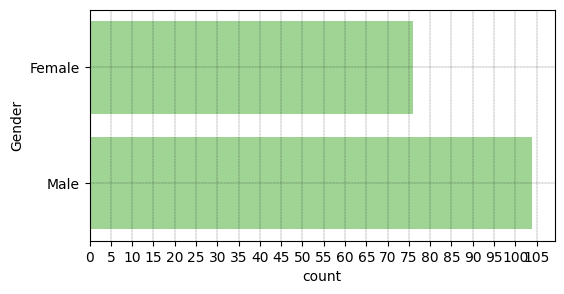

In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(df['Gender'], color=colors[2])
plt.xticks(np.arange(0,110,5))
plt.grid(color='black', linestyle='--', linewidth=0.2)
plt.show()

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


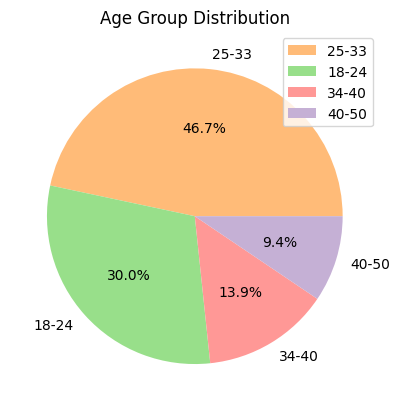

In [ ]:
ageGroup = df['AgeGroup'].value_counts().reset_index()
ageGroup.columns = ['AgeGroup', 'Count']

plt.pie(ageGroup['Count'], labels = ageGroup['AgeGroup'],autopct='%1.1f%%', colors= colors[1:5])
plt.legend()
plt.title('Age Group Distribution')
plt.show()

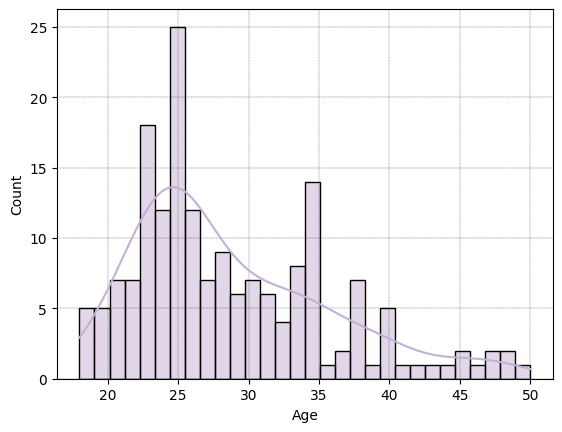

In [ ]:
age = df['Age']

sns.histplot(age, bins=30, kde=True, color=colors[4])
plt.grid(color='black', linestyle='--', linewidth=0.2)
plt.show()

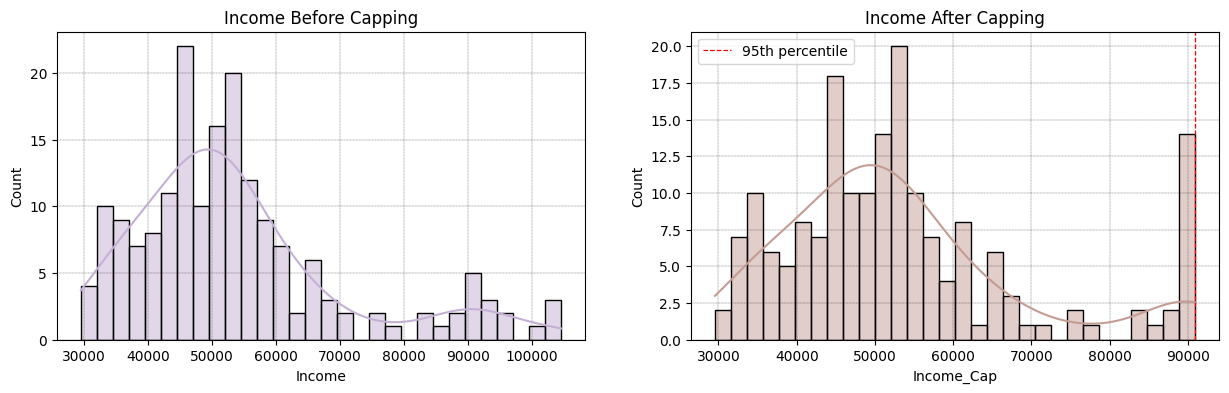

In [ ]:
income = df['Income']
incomeCap = df['Income_Cap']

plt.figure(figsize=(15, 4))

plt.subplot(1,2,1)
sns.histplot(income, bins=30, kde=True, color=colors[4])
plt.grid(color='black', linestyle='--', linewidth=0.2)
plt.title("Income Before Capping")

plt.subplot(1,2,2)
sns.histplot(incomeCap, bins=30, kde=True, color=colors[5])
plt.grid(color='black', linestyle='--', linewidth=0.2)
plt.title("Income After Capping")
income_cap_val = df['Income'].quantile(0.95)
plt.axvline(income_cap_val, color='red', linestyle='--',linewidth=0.9, label='95th percentile')
plt.legend()


plt.show()

### Distribution of Income (Before and After Capping)

The following plots compare the income distribution before and after applying 95th percentile capping:

- The original distribution (left) shows a long right tail with a few very high-income values.
- After capping (right), we preserve the overall pattern while limiting extreme values to improve clarity in plots and group comparisons.

The red dotted line indicates the 95th percentile threshold used for capping.


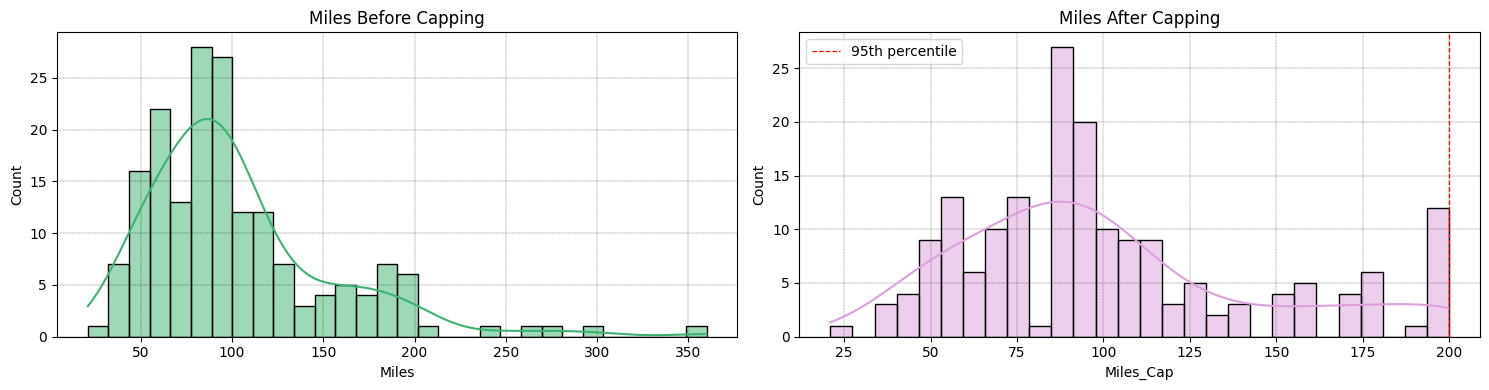

In [ ]:
miles = df['Miles']
milesCap = df['Miles_Cap']

plt.figure(figsize=(15, 4))

# Miles Before Capping
plt.subplot(1, 2, 1)
sns.histplot(miles, bins=30, kde=True, color=colors[6])
plt.grid(color='black', linestyle='--', linewidth=0.2)
plt.title("Miles Before Capping")

# Miles After Capping
plt.subplot(1, 2, 2)
sns.histplot(milesCap, bins=28, kde=True, color=colors[7])
plt.grid(color='black', linestyle='--', linewidth=0.2)
plt.title("Miles After Capping")
miles_cap_val = df['Miles'].quantile(0.95)
plt.axvline(miles_cap_val, color='red', linestyle='--', linewidth=0.9, label='95th percentile')
plt.legend()

plt.tight_layout()
plt.show()


### Distribution of Miles (Before and After Capping)

- The original distribution of miles walked/ran per week was right-skewed, with a few extremely high values.
- Capping at the 95th percentile helped smooth out the extreme outliers while keeping the overall trend intact.
- This ensures a more reliable interpretation of usage behavior across typical customers.
